In [70]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from pydiffmap import diffusion_map as dm
from pydiffmap.visualization import embedding_plot, data_plot

path ="DiffusionMaps/pictures/"
%matplotlib inline



mix_0.npy


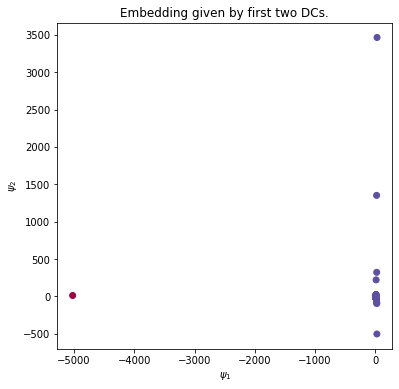

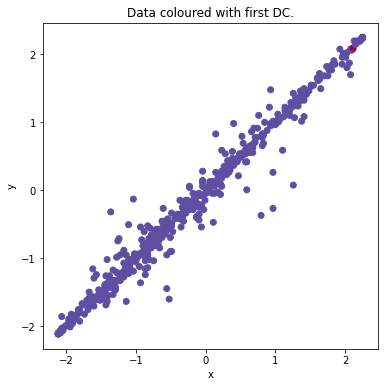

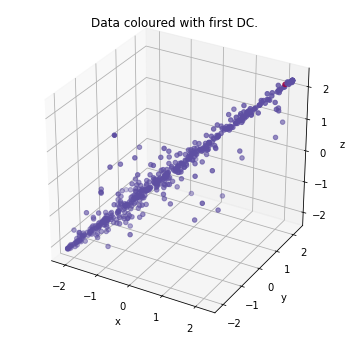

mix_1.npy


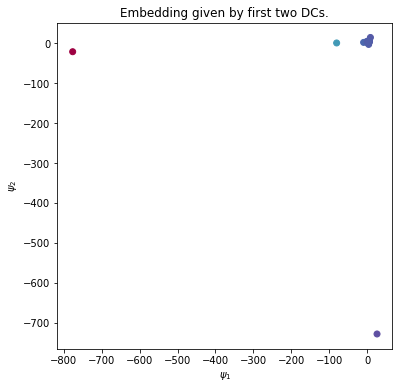

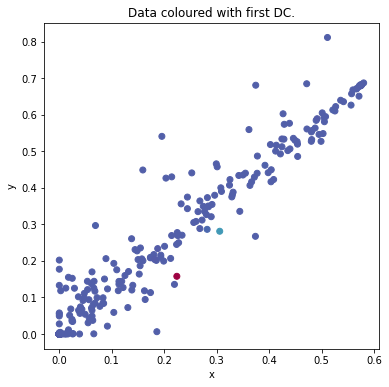

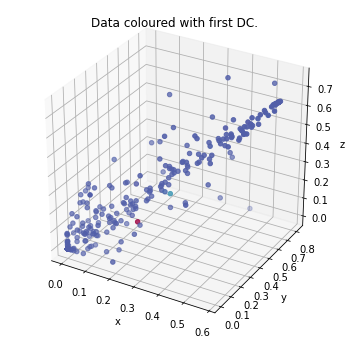

mix_2.npy


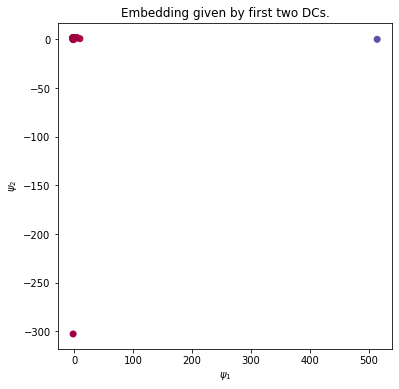

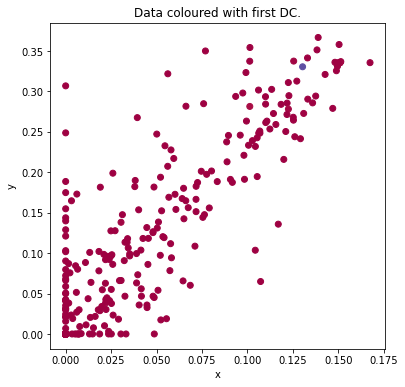

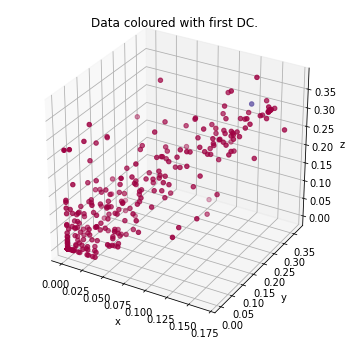

mix_3.npy


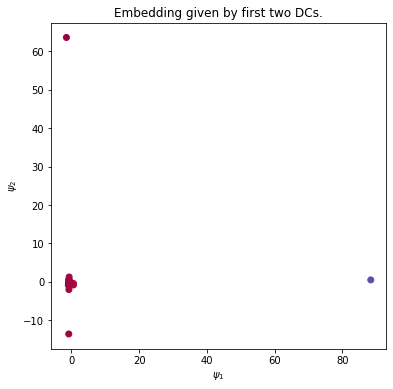

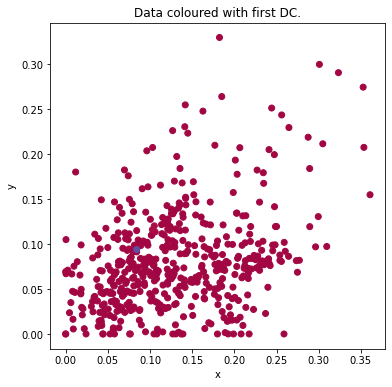

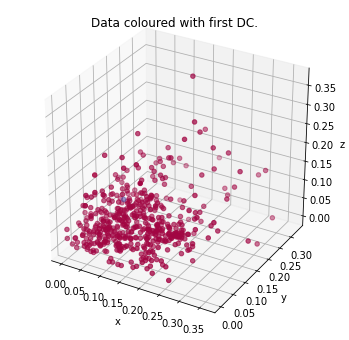

mix_4.npy


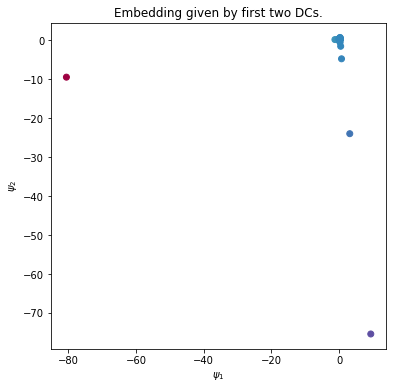

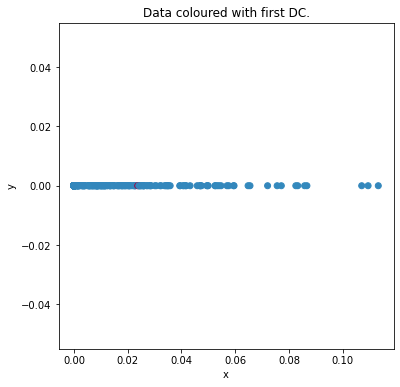

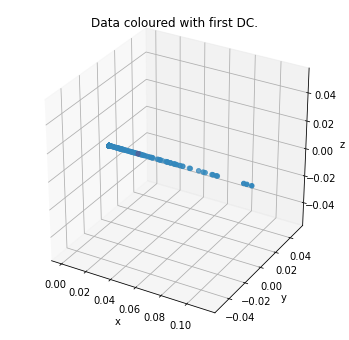

mix_5.npy


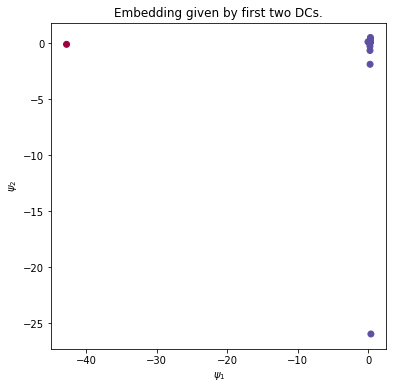

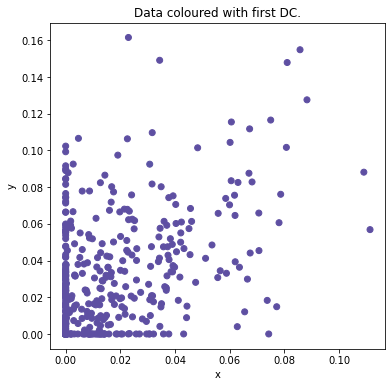

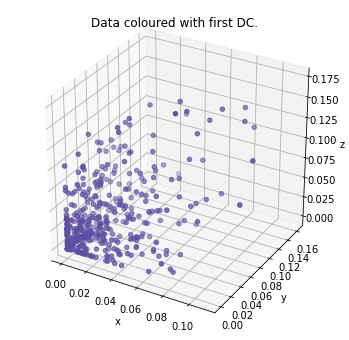

mix_6.npy


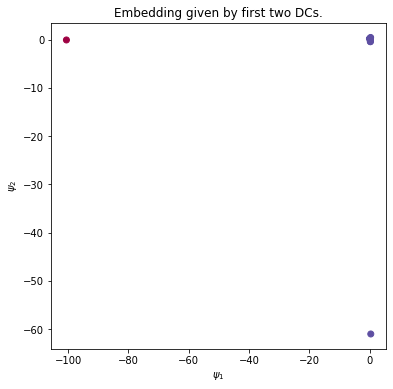

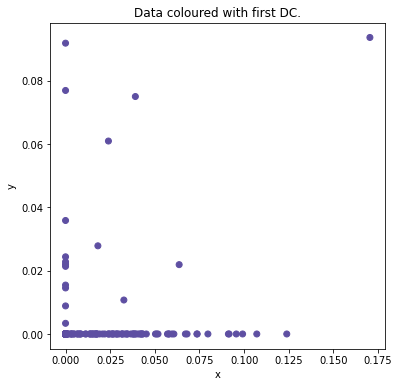

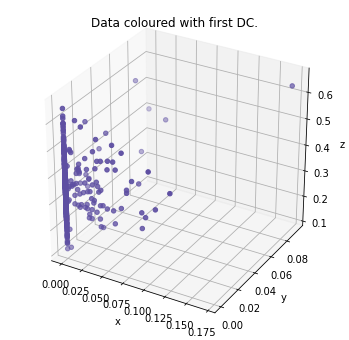

mix_7.npy


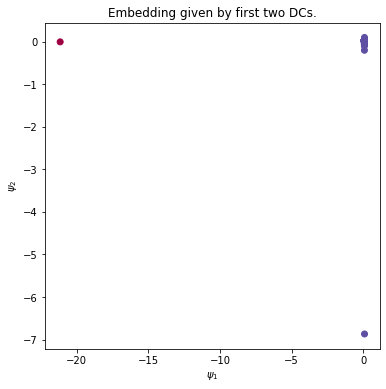

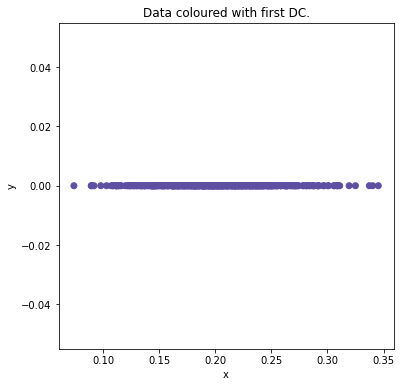

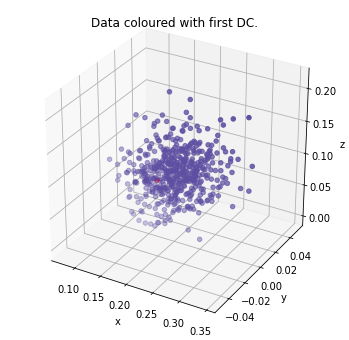

mix_8.npy


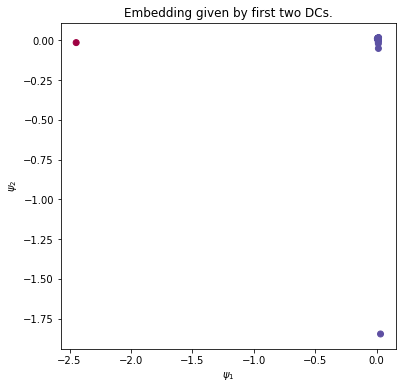

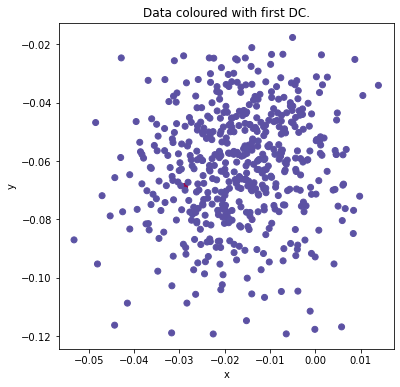

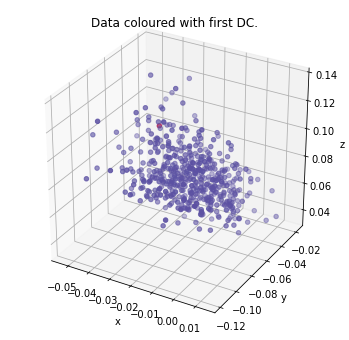

n01882714_0.npy


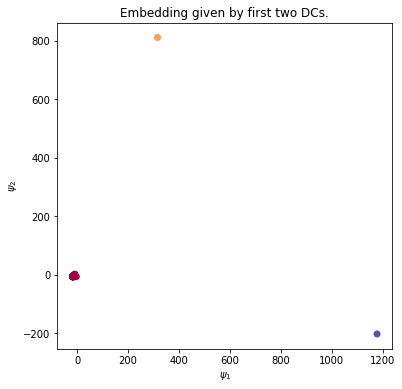

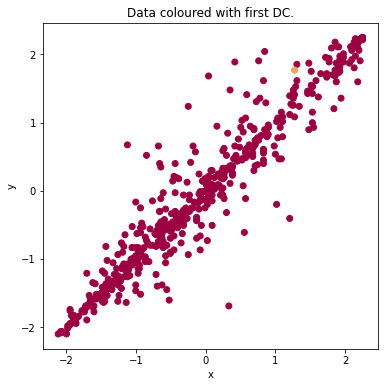

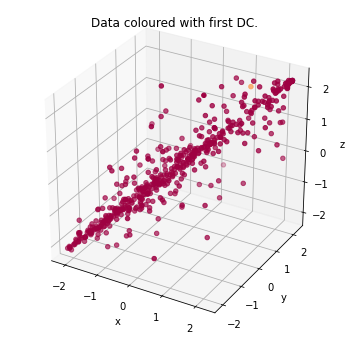

n01882714_1.npy


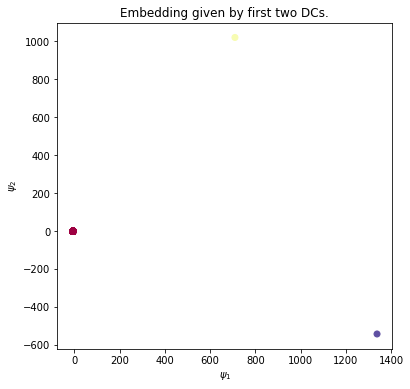

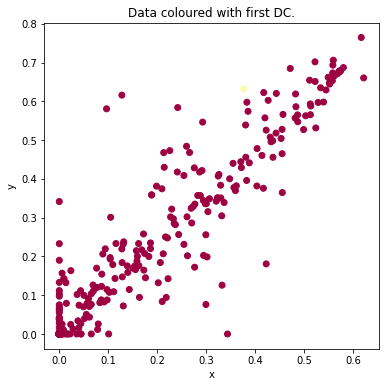

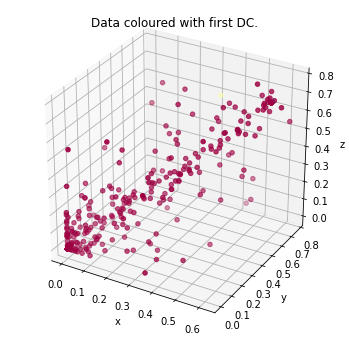

n01882714_2.npy


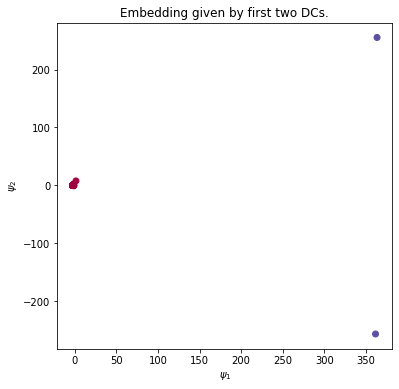

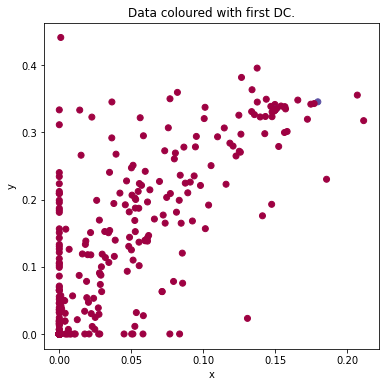

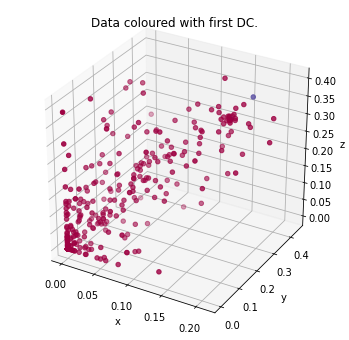

n01882714_3.npy


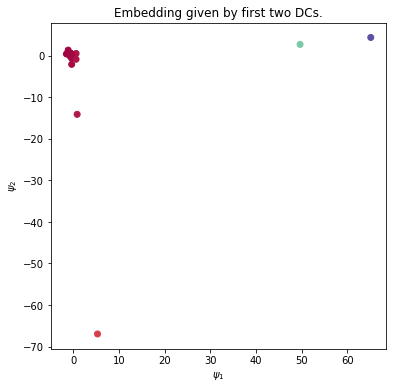

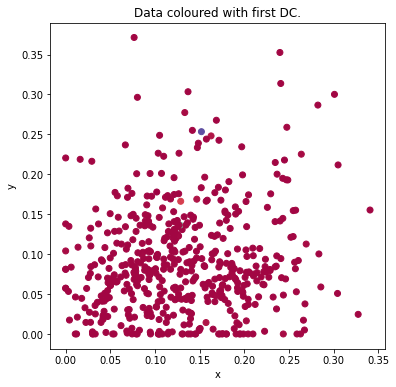

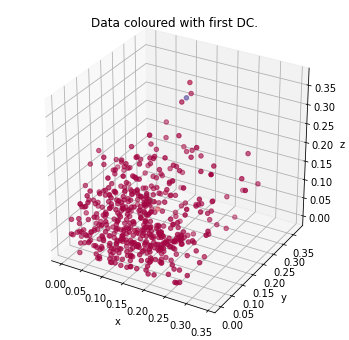

n01882714_4.npy


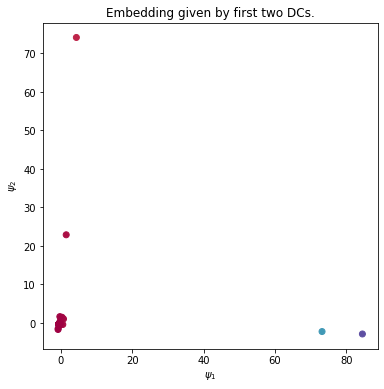

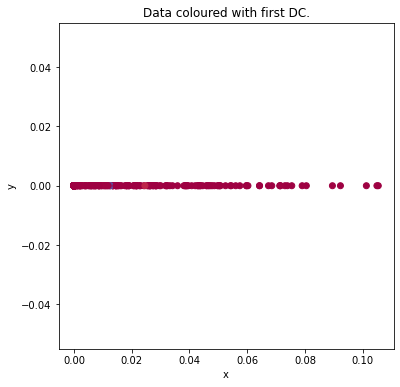

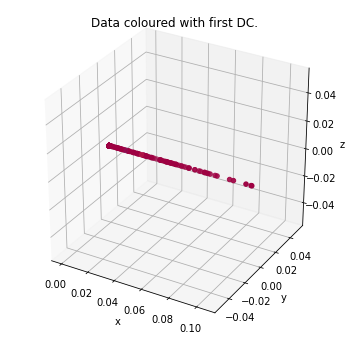

n01882714_5.npy


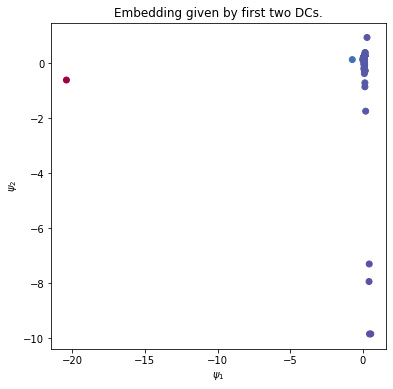

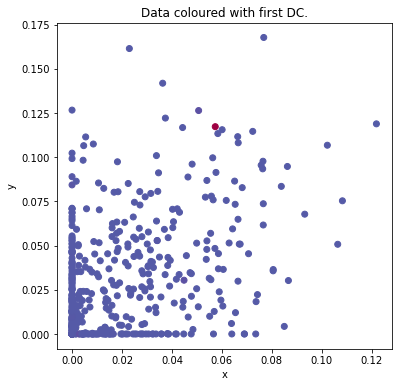

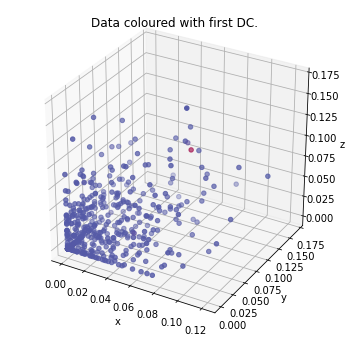

n01882714_6.npy


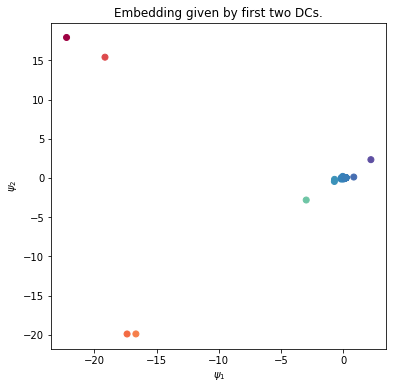

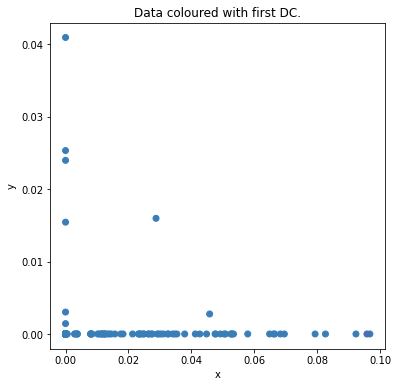

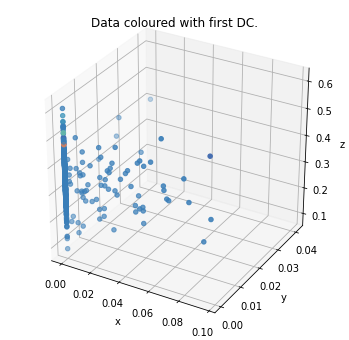

n01882714_7.npy


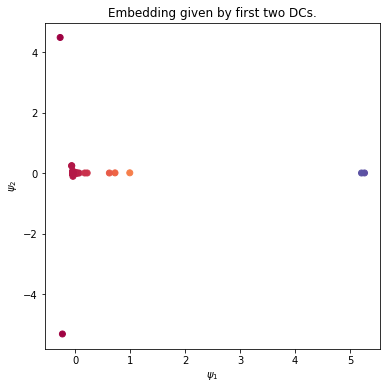

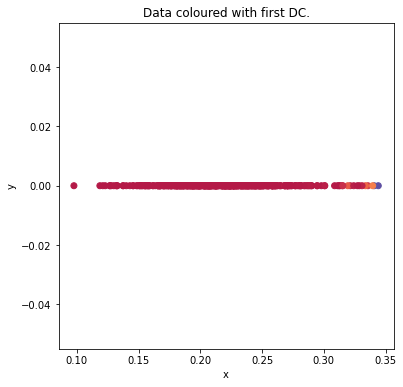

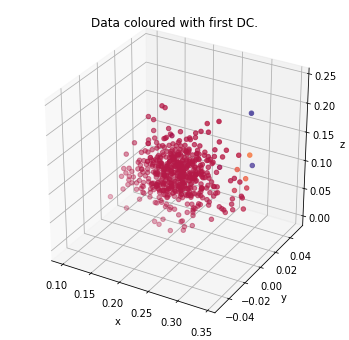

n01882714_8.npy


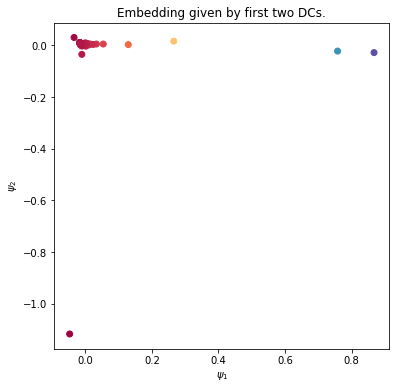

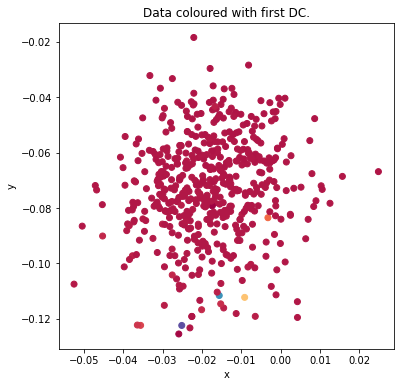

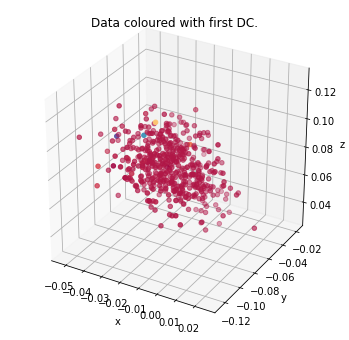

n02086240_0.npy


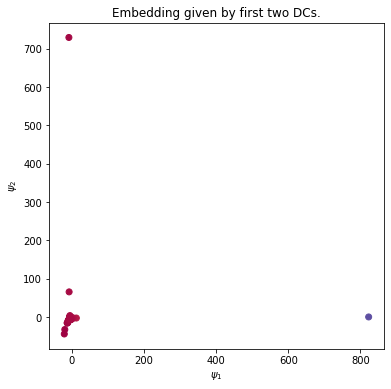

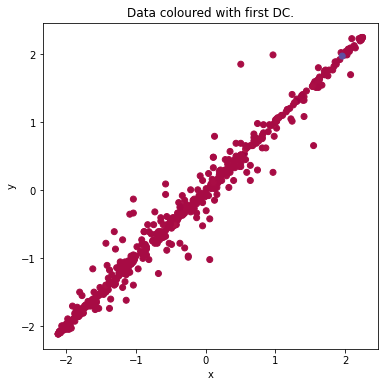

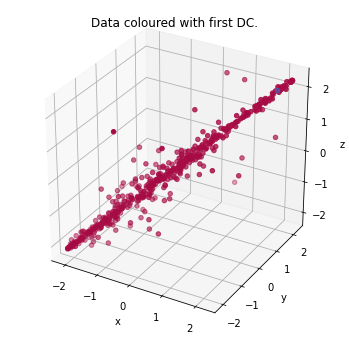

n02086240_1.npy


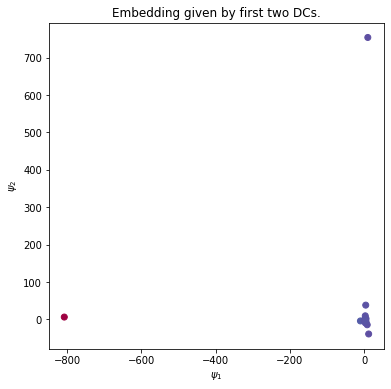

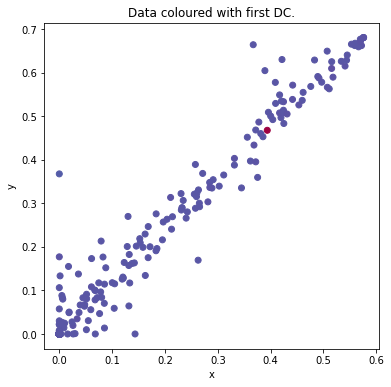

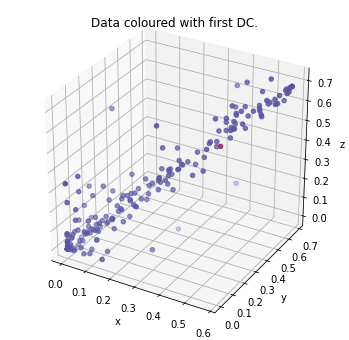

n02086240_2.npy


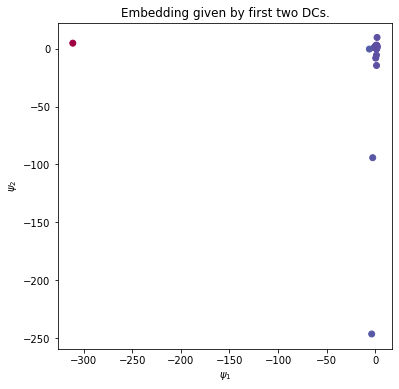

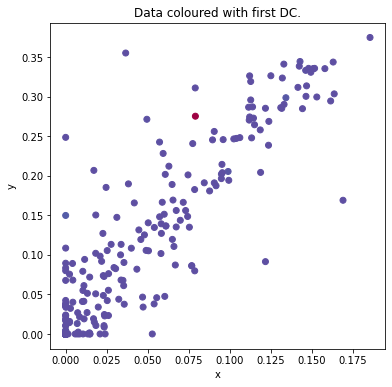

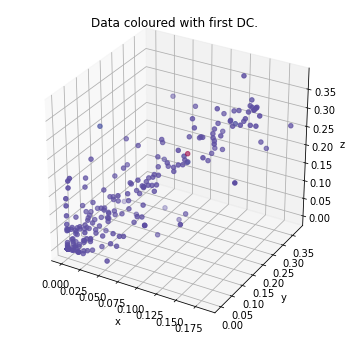

n02086240_3.npy


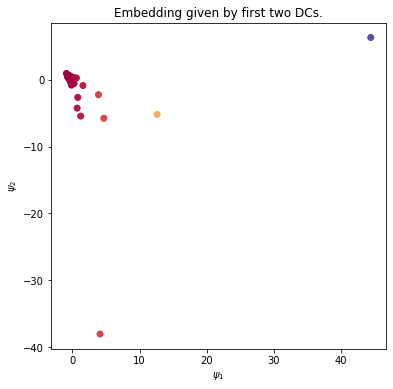

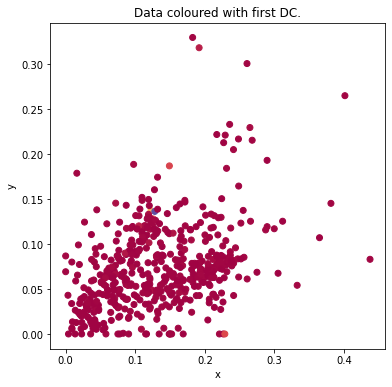

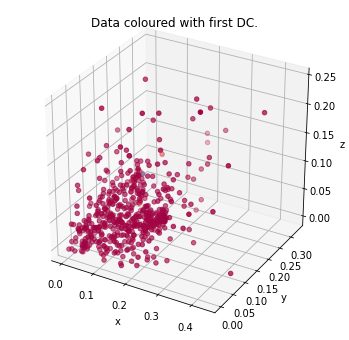

n02086240_4.npy


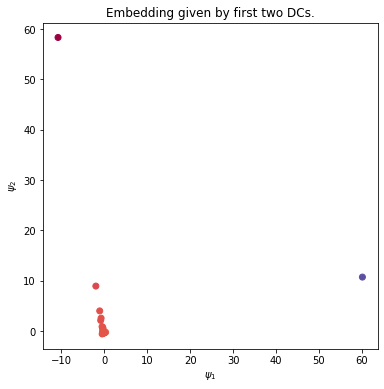

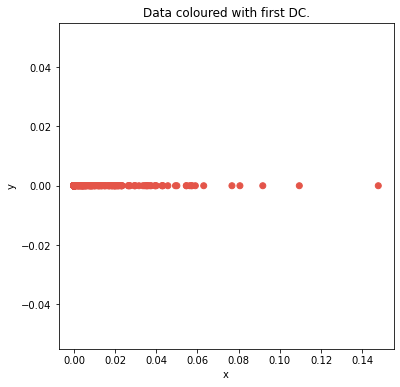

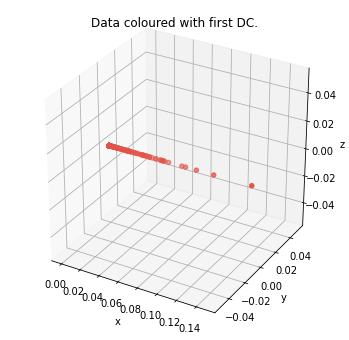

n02086240_5.npy


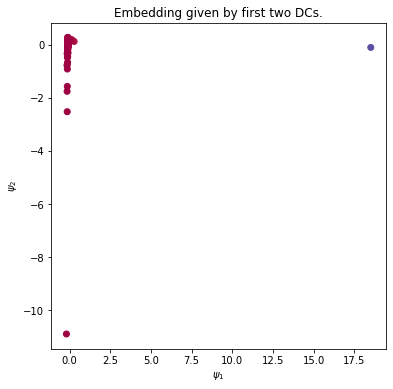

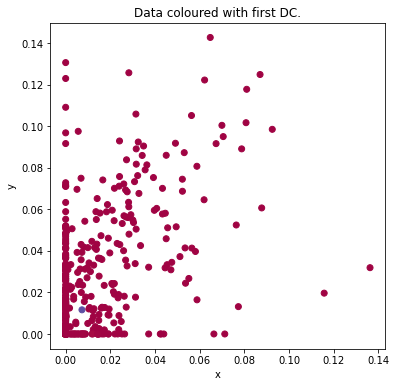

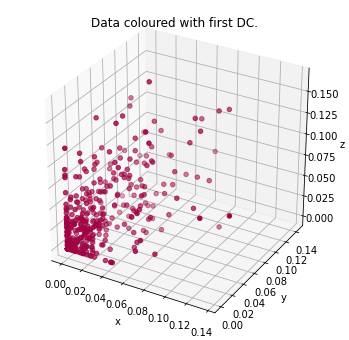

n02086240_6.npy


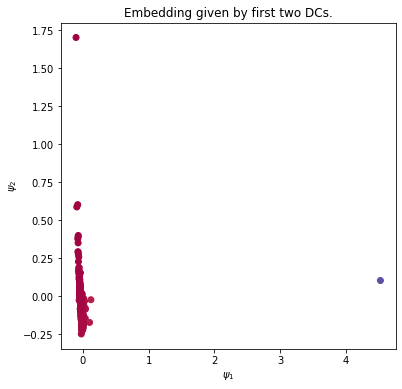

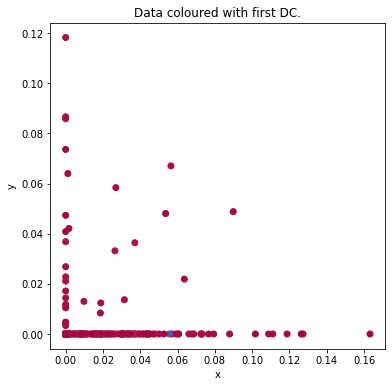

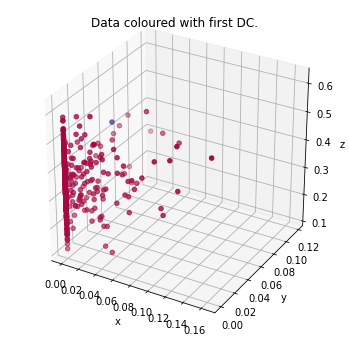

n02086240_7.npy


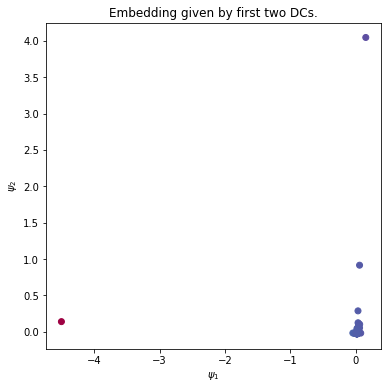

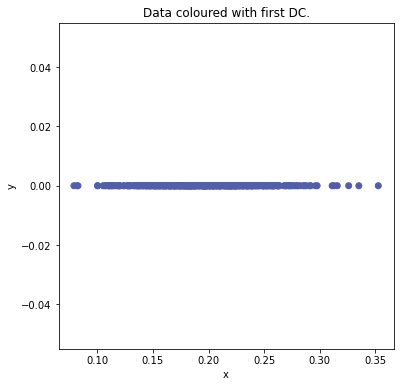

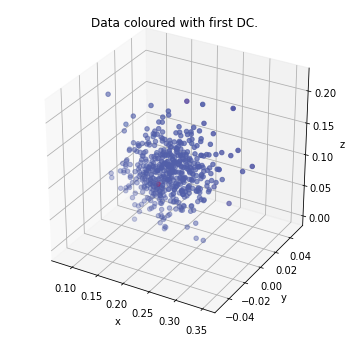

n02086240_8.npy


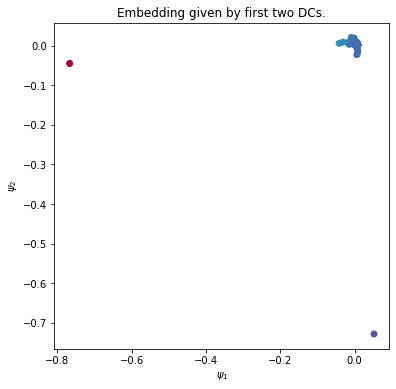

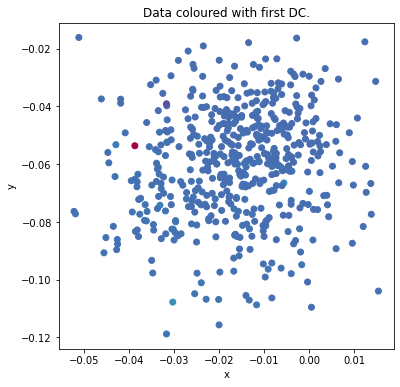

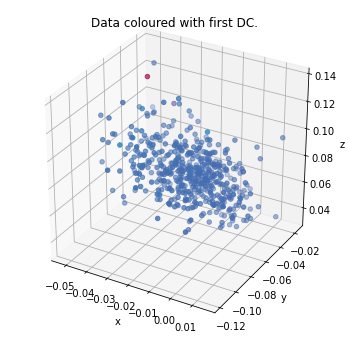

In [3]:
info = {}
filenames = """mix_0.npy
mix_1.npy
mix_2.npy
mix_3.npy
mix_4.npy
mix_5.npy
mix_6.npy
mix_7.npy
mix_8.npy
n01882714_0.npy
n01882714_1.npy
n01882714_2.npy
n01882714_3.npy
n01882714_4.npy
n01882714_5.npy
n01882714_6.npy
n01882714_7.npy
n01882714_8.npy
n02086240_0.npy
n02086240_1.npy
n02086240_2.npy
n02086240_3.npy
n02086240_4.npy
n02086240_5.npy
n02086240_6.npy
n02086240_7.npy
n02086240_8.npy""".split("\n")

#calculating the diffusion maps
for file_name in filenames:
    data = np.load(file_name)
    neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
    print(file_name)
    alph = 1
    mydmap = dm.DiffusionMap.from_sklearn(n_evecs=2, k=200, epsilon='bgh', alpha=alph, neighbor_params=neighbor_params)
    dmap = mydmap.fit_transform(data)
    key = file_name
    info[key] = [mydmap,dmap]
    f = embedding_plot(mydmap, scatter_kwargs = {'c': dmap[:,0], 'cmap': 'Spectral'})
    f =data_plot(mydmap, dim=2, scatter_kwargs = {'cmap': 'Spectral'})
    f=data_plot(mydmap, dim=3, scatter_kwargs = {'cmap': 'Spectral'})


In [75]:
#changed the data_plot function to remove the title and change resolution
def data_plot(dmap_instance, n_evec=1, dim=2, scatter_kwargs=None, show=True):
    """
    Creates diffusion map embedding scatterplot. By default, the first two diffusion
    coordinates are plotted against each other.  This only plots against the first two or three
    (as controlled by 'dim' parameter) dimensions of the data, however:
    effectively this assumes the data is two resp. three dimensional.

    Parameters
    ----------
    dmap_instance : DiffusionMap Instance
        An instance of the DiffusionMap class.
    n_evec: int, optional
        The eigenfunction that should be used to color the plot.
    dim: int, optional, 2 or 3.
        Optional argument that controls if a two- or three dimensional plot is produced.
    scatter_kwargs : dict, optional
        Optional arguments to be passed to the scatter plot, e.g. point color,
        point size, colormap, etc.
    show : boolean, optional
        If true, calls plt.show()

    Returns
    -------
    fig : pyplot figure object
        Figure object where everything is plotted on.
    """
    if scatter_kwargs is None:
        scatter_kwargs = {}
    fig = plt.figure(figsize=(10, 10))
    if (dim == 2):
        plt.scatter(dmap_instance.data[:, 0], dmap_instance.data[:, 1], c=dmap_instance.dmap[:, n_evec-1], **scatter_kwargs)
        plt.xlabel('x')
        plt.ylabel('y')
    elif (dim == 3):
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(dmap_instance.data[:, 0], dmap_instance.data[:, 1], dmap_instance.data[:, 2], c=dmap_instance.dmap[:, n_evec-1], **scatter_kwargs)
    plt.axis('tight')
    if show:
        plt.show()
    return fig

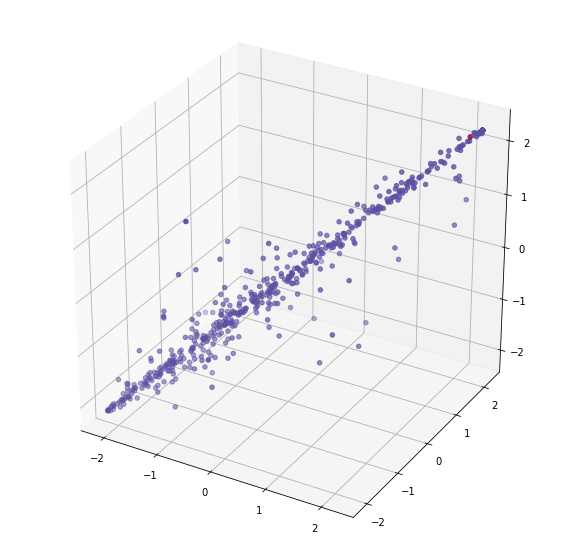

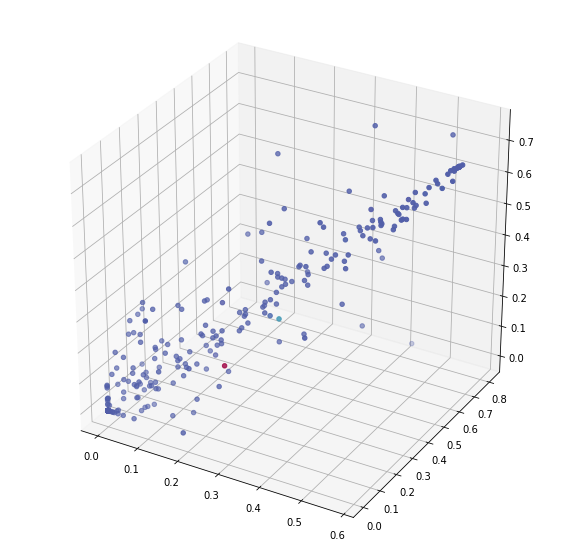

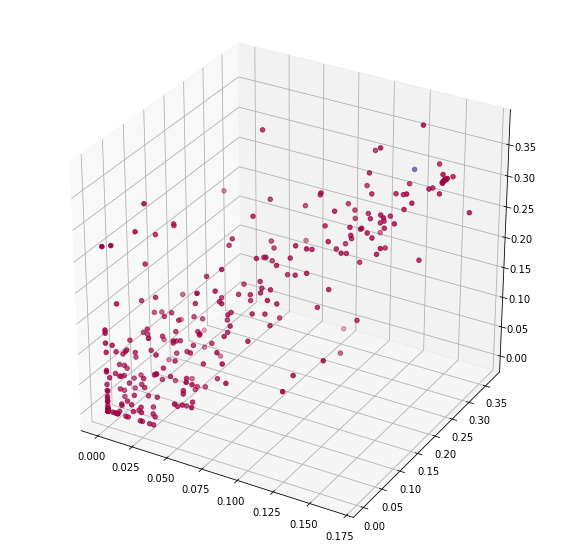

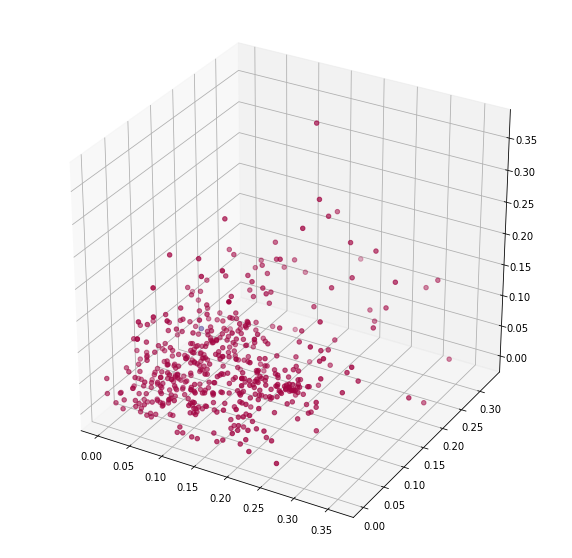

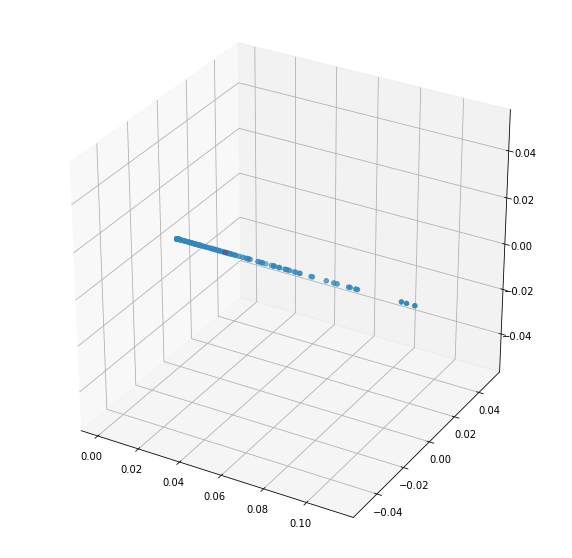

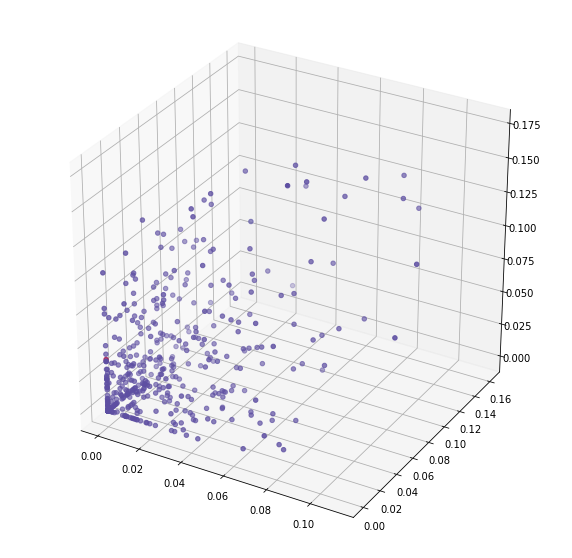

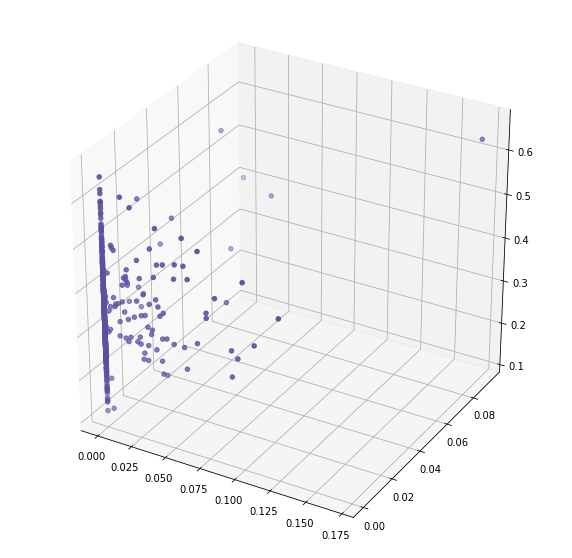

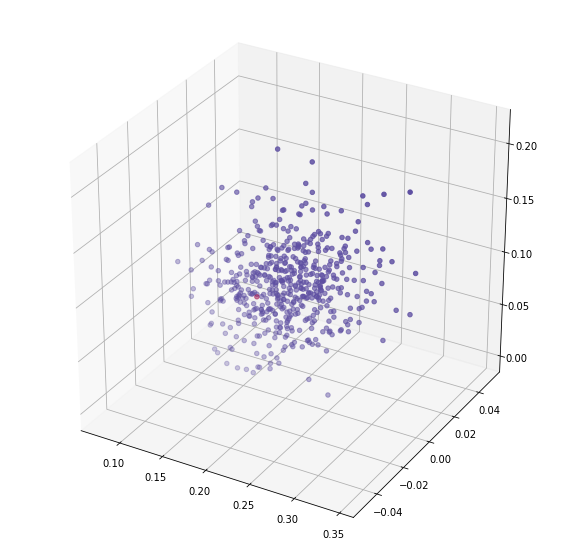

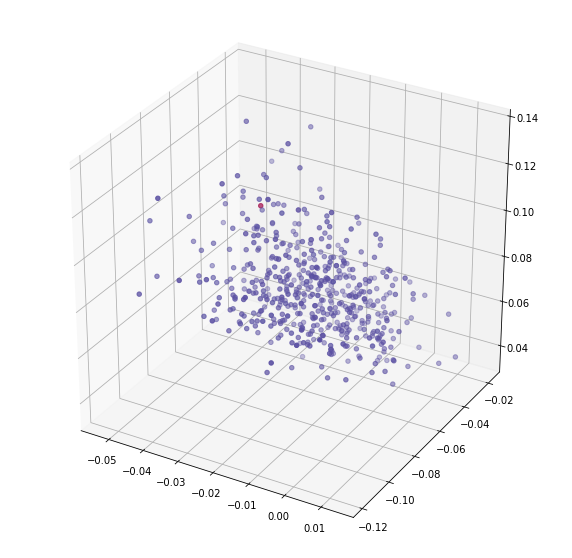

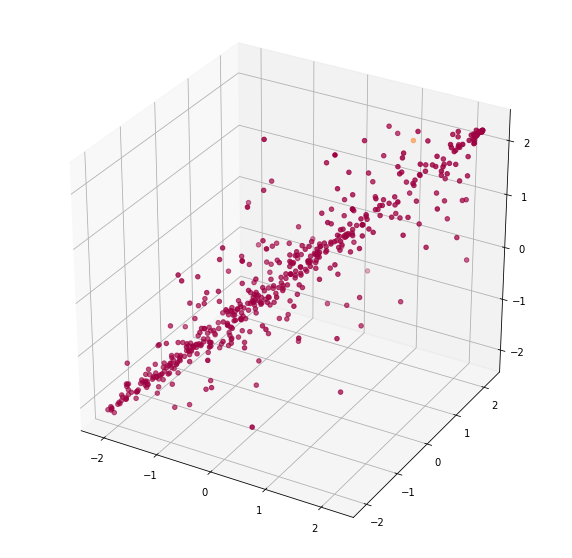

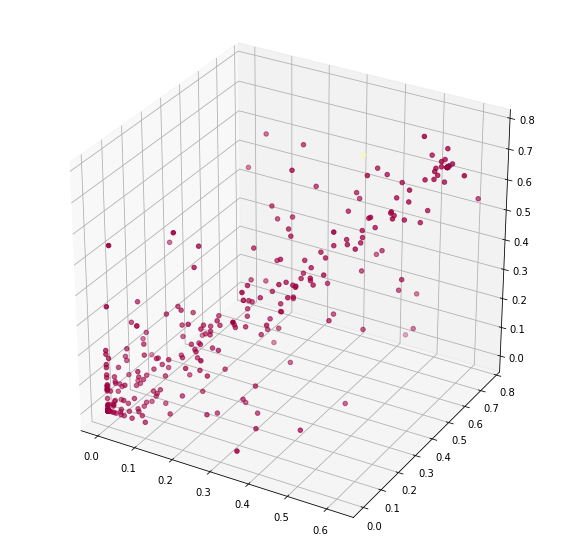

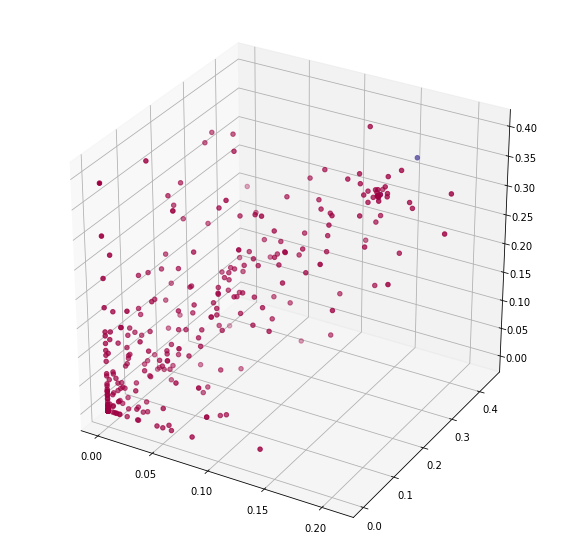

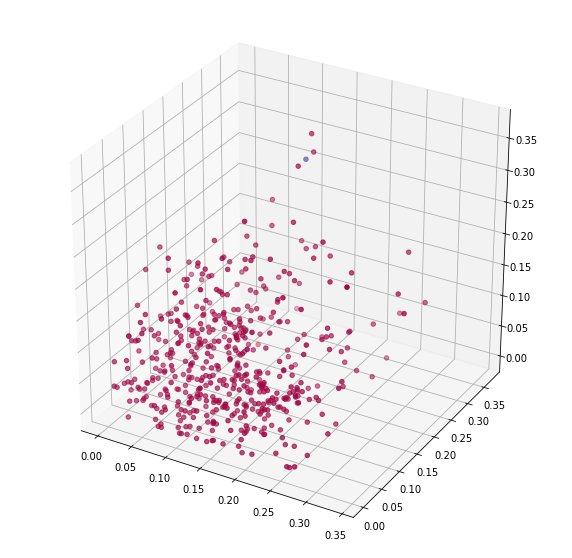

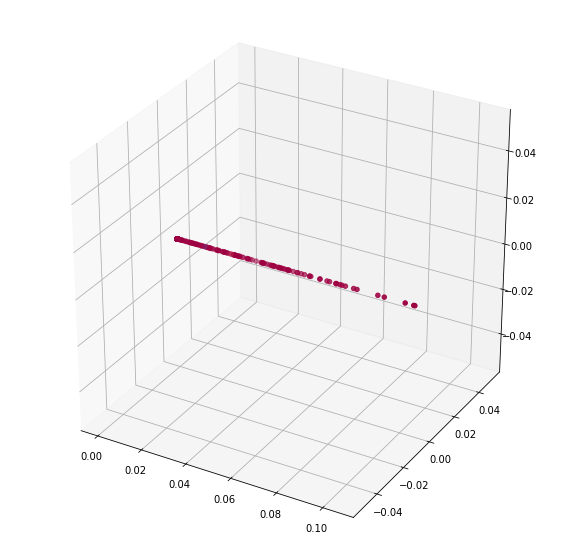

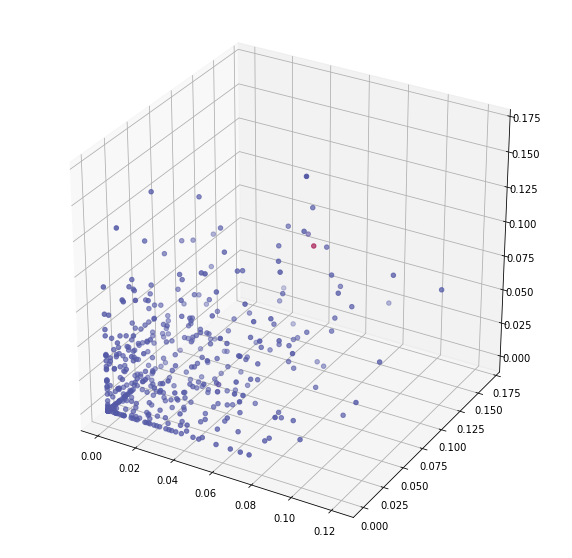

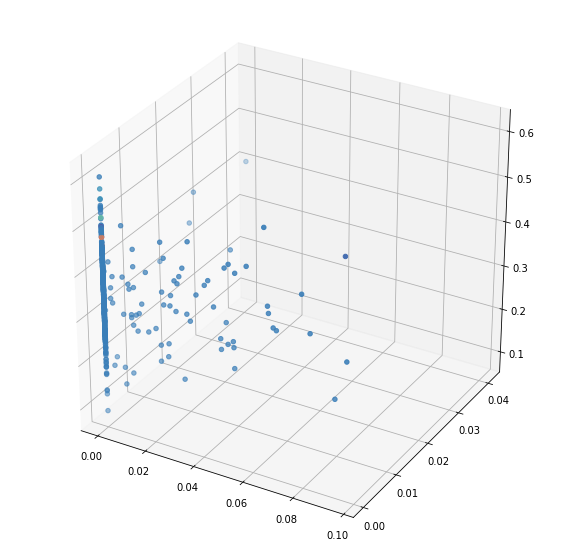

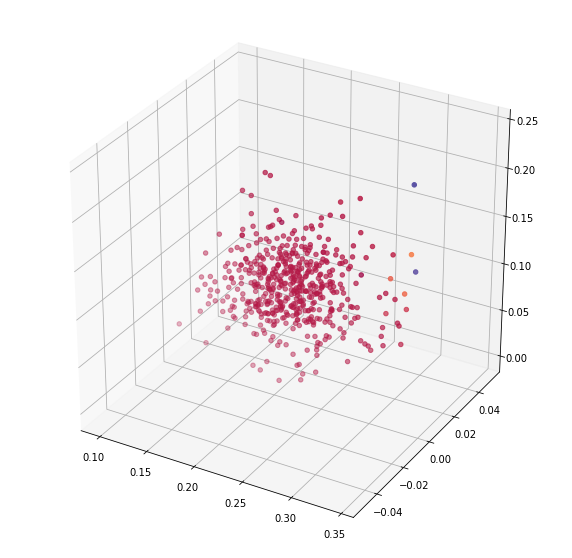

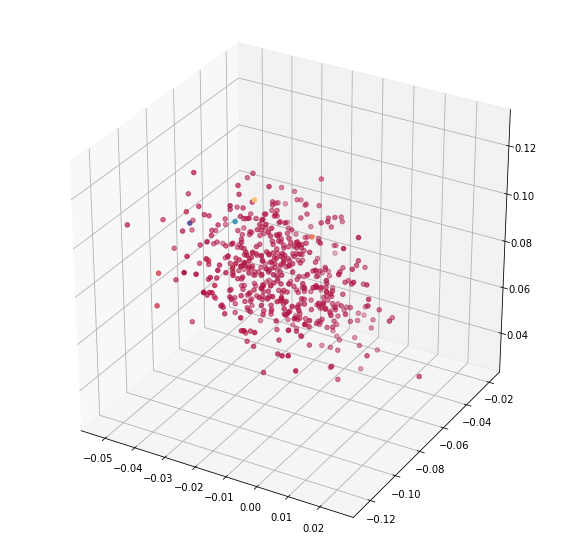

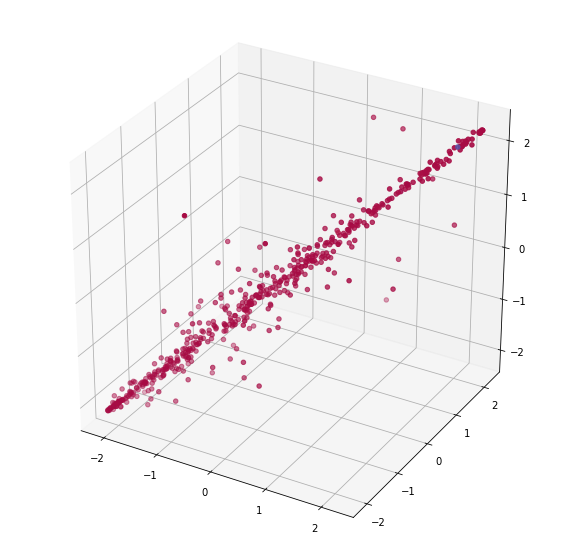

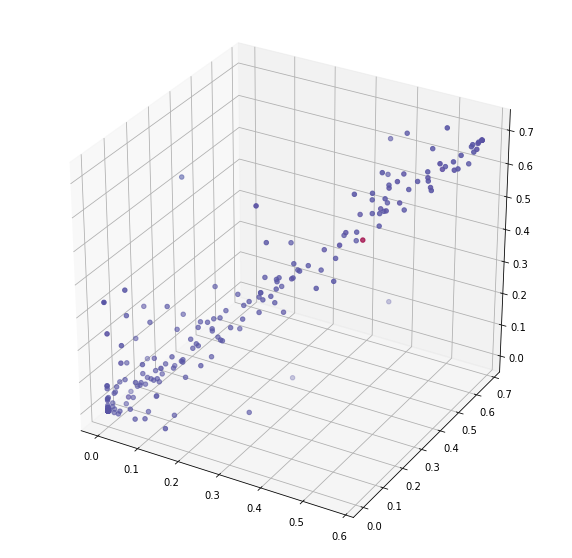

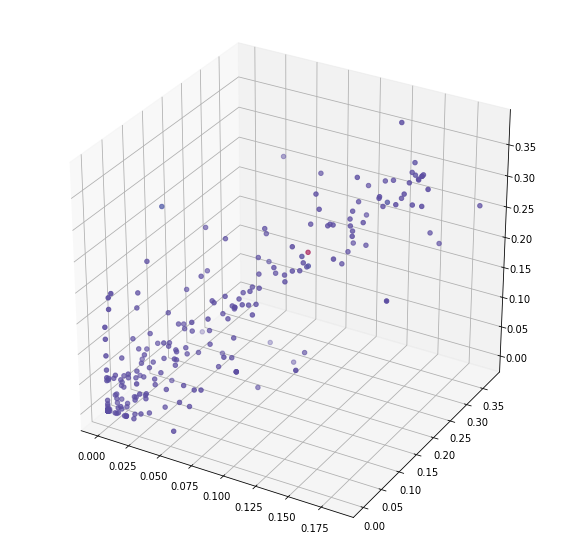

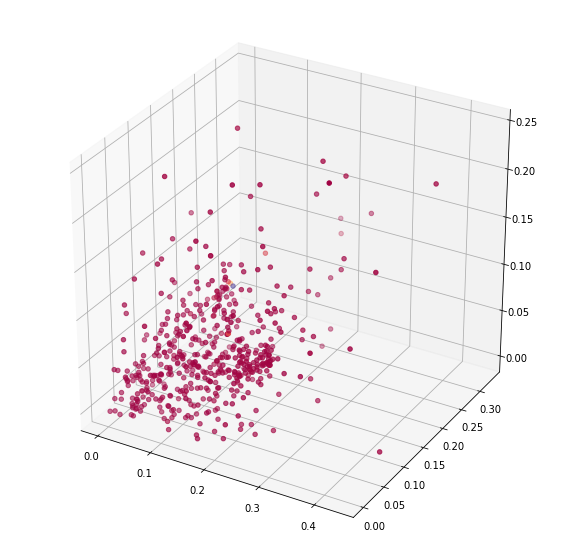

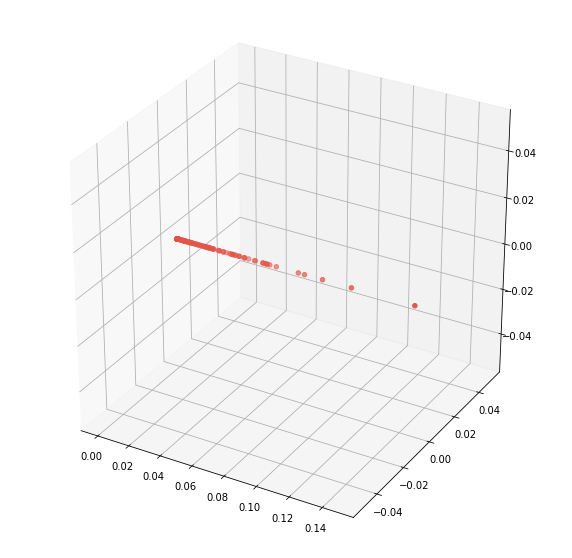

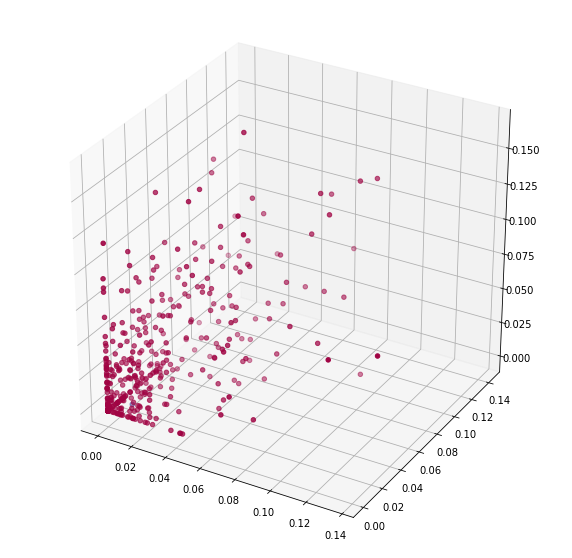

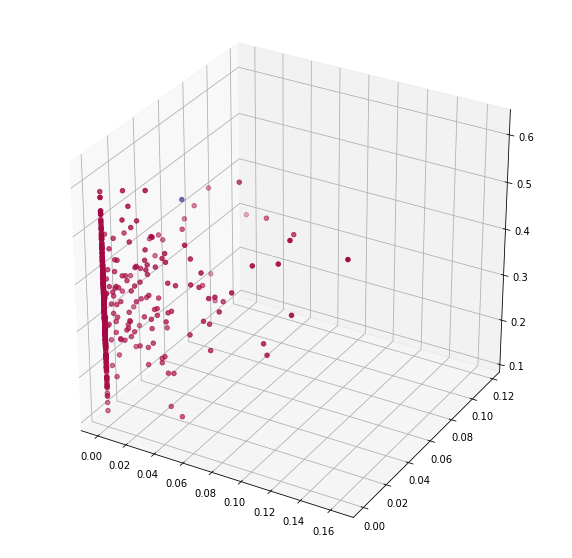

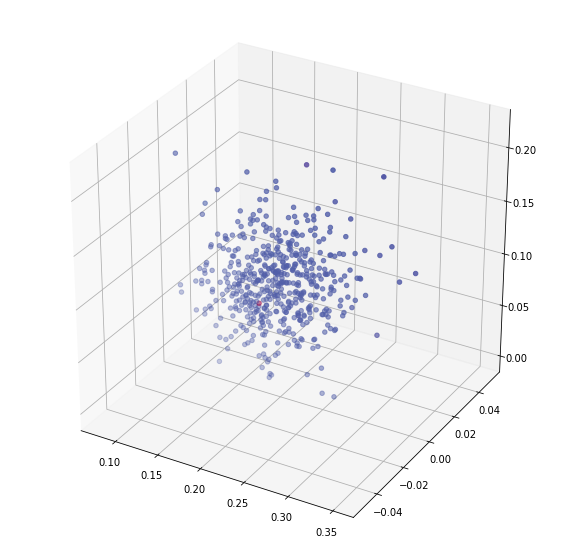

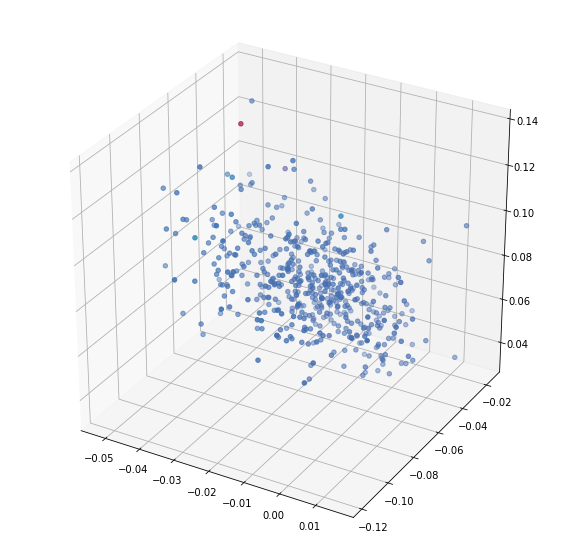

In [76]:
#subplots
for key in info:
    dmap_instance = mydmap
    n_evec=1, 
    scatter_kwargs={'cmap': 'Spectral'} 
    show=True
    mydmap,dmap =info[key]
    f =data_plot(mydmap, dim=3, scatter_kwargs = {'cmap': 'Spectral'})
    f.savefig(path+key+".png")
    
